<a href="https://colab.research.google.com/github/nikeyzdereva/add/blob/main/progect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Загрузка и первичный анализ датасета
#Для загрузки датасета мы будем использовать библиотеку Pandas:
#python
#Copy code
import pandas as pd

In [8]:
# загружаем датасет
df = pd.read_csv("wcecr.csv", index_col=0)

In [10]:
# выводим первые 5 строк датасета
print(df.head())
#Предобработка данных
#Перед тем, как мы начнем анализировать данные, необходимо выполнить их предобработку. Мы будем удалять некоторые столбцы, содержащие ненужную информацию, а также удалять строки с отсутствующими значениями:
#python
#Copy code
# удаляем некоторые столбцы
df = df.drop(["Clothing ID", "Age", "Title", "Recommended IND", "Positive Feedback Count", "Division Name", "Department Name", "Class Name"], axis=1)

   Clothing ID   Age                    Title  \
0          767  33.0                      NaN   
1         1080  34.0                      NaN   
2         1077  60.0  Some major design flaws   
3         1049  50.0         My favorite buy!   
4          847  47.0         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...     4.0              1.0   
1  Love this dress!  it's sooo pretty.  i happene...     5.0              1.0   
2  I had such high hopes for this dress and reall...     3.0              0.0   
3  I love, love, love this jumpsuit. it's fun, fl...     5.0              1.0   
4  This shirt is very flattering to all due to th...     5.0              1.0   

   Positive Feedback Count   Division Name Department Name Class Name  
0                      0.0       Initmates        Intimate  Intimates  
1                      4.0         General         Dresses    Dresses  
2 

In [12]:
# удаляем строки с отсутствующими значениями
df = df.dropna()
#Анализ данных
#Теперь мы можем перейти к анализу данных. Мы начнем с анализа количественных признаков:
# выводим описательную статистику для количественных признаков
print(df.describe())
#Затем мы можем проанализировать распределение оценок:

             Rating
count  19602.000000
mean       4.181563
std        1.117842
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


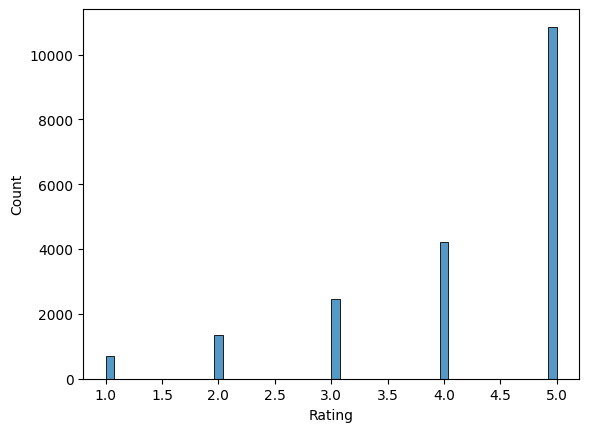

In [13]:
# строим гистограмму распределения оценок
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x="Rating")
plt.show()
#Далее мы можем проанализировать распределение длины отзывов:


In [14]:
# создаем столбец с длиной отзывов
df["Review Length"] = df["Review Text"].apply(lambda x: len(x.split()))

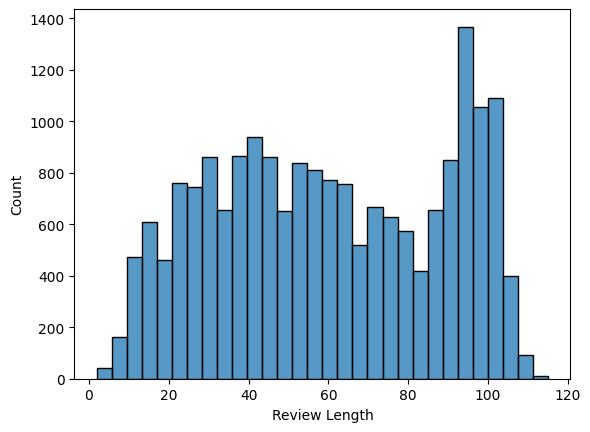

In [15]:
# строим гистограмму распределения длины отзывов
sns.histplot(data=df, x="Review Length")
plt.show()
#Обучение модели машинного обучения
#Мы можем использовать датасет для обучения модели машинного обучения, которая будет предсказывать оценку товара на основе отзыва.
#Для этого мы будем использовать библиотеку Scikit-learn:

In [18]:
# импортируем необходимые классы
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df["Review Text"], df["Rating"], test_size=0.2, random_state=42)
#Обучаем векторизатор
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [19]:
#Обучаем модель
model = LogisticRegression(max_iter=10000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=10000)

In [20]:
#Предсказываем оценки на тестовой выборке
y_pred = model.predict(X_test_vec)

#Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


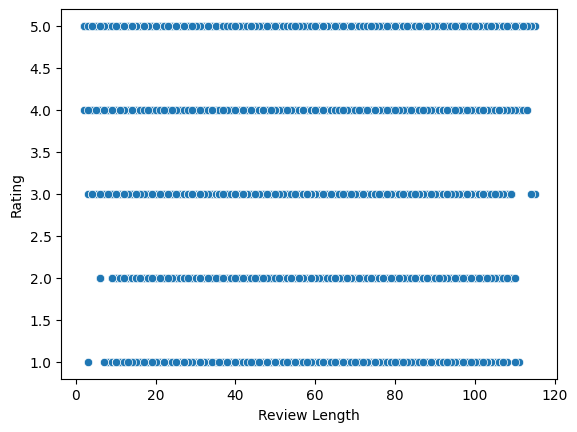

In [21]:
#Теперь мы можем использовать обученную модель для предсказания оценок товаров на новых отзывах.
#Для визуализации данных мы можем использовать библиотеку Matplotlib. Например, мы можем построить график зависимости оценки товара от длины отзыва:
# строим график зависимости оценки от длины отзыва
sns.scatterplot(data=df, x="Review Length", y="Rating")
plt.show()
#Мы можем использовать библиотеку Plotly для создания интерактивных графиков. Например, мы можем построить график распределения оценок с помощью круговой диаграммы:
# импортируем библиотеку Plotly
import plotly.express as px

In [22]:
# создаем датафрейм с распределением оценок
ratings = df["Rating"].value_counts().reset_index()
ratings.columns = ["Rating", "Count"]


In [23]:
# строим круговую диаграмму
fig = px.pie(ratings, values="Count", names="Rating", title="Distribution of Ratings")
fig.show()
#Извлечение ключевых слов из отзывов
#Мы можем использовать библиотеку TextBlob для извлечения ключевых слов из отзывов. Например, мы можем добавить новый столбец в наш датафрейм с ключевыми словами:


In [24]:
# импортируем библиотеку TextBlob
from textblob import TextBlob

In [37]:
# определяем функцию для извлечения ключевых слов
def extract_keywords(text):
    blob = TextBlob(text)
    return [word for word, pos in blob.tags if pos.startswith("NN")]
    # извлекаем ключевые слова из отзывов
    df["Keywords"]

In [38]:
df

,Review Text,Rating,Review Length
0,Absolutely wonderful - silky and sexy and comf...,4.0,8
1,Love this dress! it's sooo pretty. i happene...,5.0,62
2,I had such high hopes for this dress and reall...,3.0,98
3,"I love, love, love this jumpsuit. it's fun, fl...",5.0,22
4,This shirt is very flattering to all due to th...,5.0,36
...,...,...,...
20327,I normally don't care for rayon clothing but t...,5.0,40
20328,"As a teacher, it's so great to be able to find...",5.0,29
20329,I bought the black and love it. i bought both ...,5.0,55
20330,I absolutely love this blouse! it's easily one...,5.0,95
